# seaborn可视化

In [2]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd


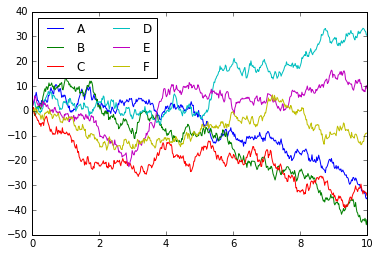

In [3]:
#画随机游走图
rng=np.random.RandomState(0)
x=np.linspace(0,10,500)
y=np.cumsum(rng.randn(500,6),0)
plt.plot(x,y)
plt.legend('ABCDEF',ncol=2,loc='upper left')

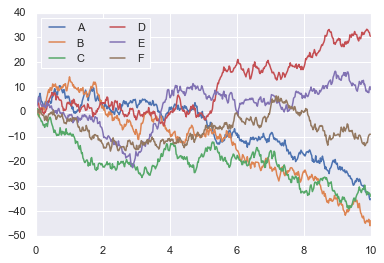

In [4]:
import seaborn as sns
sns.set()
plt.plot(x,y)
plt.legend('ABCDEF',ncol=2,loc='upper left')

### seaborn图形介绍

E:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


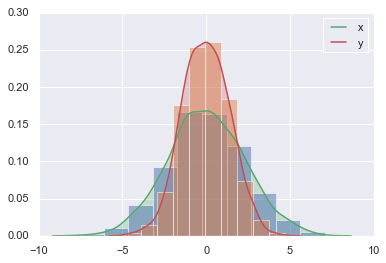

In [5]:
#频次直方图，kde和密度图
data=np.random.multivariate_normal([0,0],[[5,2],[2,2]],size=2000)
data=pd.DataFrame(data,columns=['x','y'])
for col in 'xy':
    plt.hist(data[col],normed=True,alpha=0.5)
#kde图 获取白能量的平滑估计
for col in 'xy':
    sns.kdeplot(data[col],shade=True)

E:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


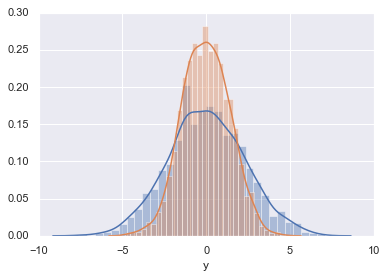

In [6]:
#displot可以结合频次直方图和kde图
sns.distplot(data['x'])
sns.distplot(data['y'])


E:\anaconda\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
E:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


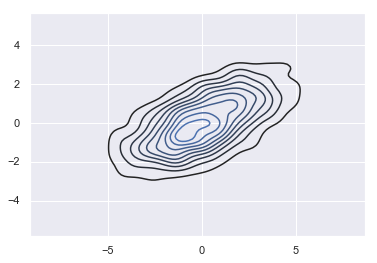

In [7]:
#二维数据可视化图
sns.kdeplot(data)

E:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


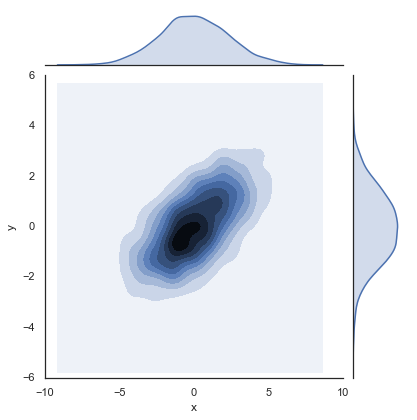

In [8]:
#二维联合分布图
with sns.axes_style('white'):
    sns.jointplot("x","y",data,kind='kde')

In [9]:
#矩阵图
iris=sns.load_dataset("iris")
iris.head()


sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

E:\anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
E:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


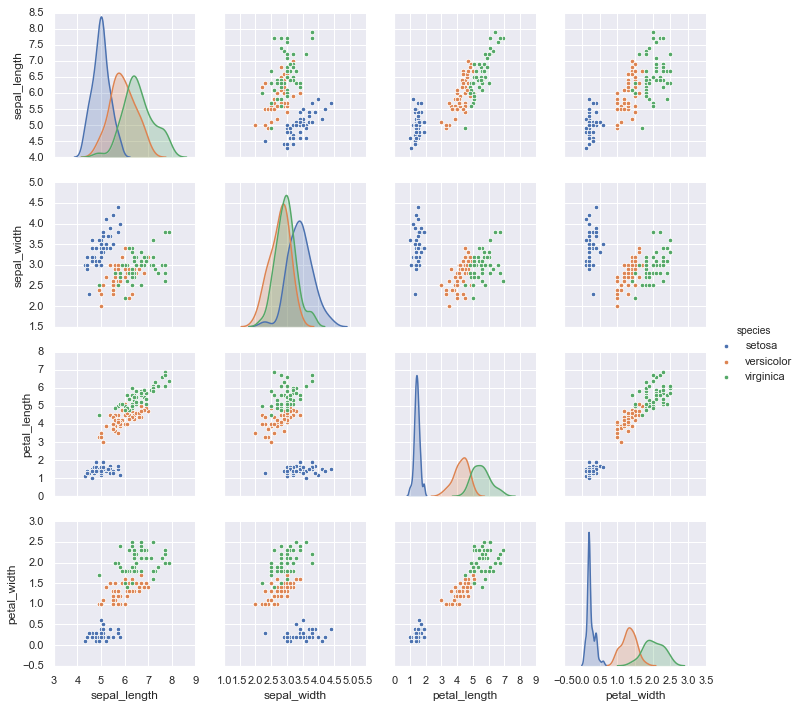

In [10]:
sns.pairplot(iris,hue='species',size=2.5)

In [11]:
#分面频次直方图
tips=sns.load_dataset('tips')
tips.head()


total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

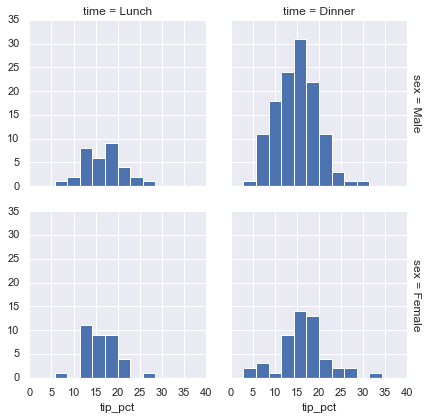

In [12]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
grid=sns.FacetGrid(tips,row="sex",col="time",margin_titles=True)
grid.map(plt.hist,"tip_pct",bins=np.linspace(0,40,15))

E:\anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


AttributeError: 'FacetGrid' object has no attribute 'set_axis_lables'

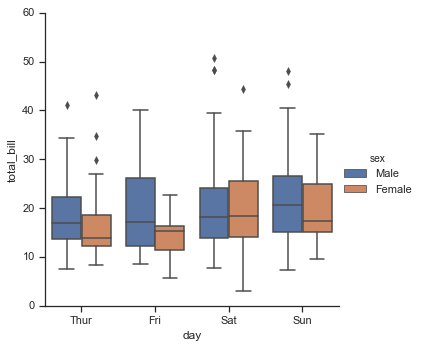

In [13]:
#因子图
with sns.axes_style(style='ticks'):
    g=sns.factorplot("day","total_bill","sex",data=tips,kind="box")
    g.set_axis_lables("Day","Total Bill")
